# 1. 정확도

정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [15]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit()메서드는 아무것도 학습하지 않음
    def fit(self,X,y=None):
        pass
    #predict()메서드는 단순히 Sex 피쳐가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i] ==1:
                pred[i]=0
            else:
                pred[i]=1
                
        return pred

In [16]:

# 앞장에서의 전처리 함수

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)


myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    #입력값으로 들어오는 x데이터세트의 크기만큼 모드 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
#사이킷런의 내장 데이터세트인 load_digits()을 이용해 MNIST데이터 로딩
digits=load_digits()

#digits번호가 7번이면 true, 이를 astype(int)로 1로 변환, 7번이 아니라면 false이고 0으로 변환
y=(digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)

In [23]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 : ',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


# 2. 오차행렬

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

TN이 405건, FN이 45건

정확도 = (TN + TP) / (TN + TP + NF + NP)

# 3. 정밀도와 재현율

정밀도 = TP/(FP+TP) : 예측을 p로 한 대상 중 예측과 실제 값이 p로 일치한 데이터의 비율 fp낮추는데 초점

재현율 = TP/(FN+TP) : 실제값이 p인 대상 중 예측과 실제값이 p로 일치한 데이터의 비율 fn낮추는데 초점

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy,precision,recall))

로지스틱 회귀 기반 타이타닉 생존자 예측, 평가 수행

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


In [29]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n : ',pred_proba[:3])

#예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측확률과 결과값 한눈에 보기
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
 :  [[0.4623509  0.5376491 ]
 [0.87875882 0.12124118]
 [0.87717457 0.12282543]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4623509  0.5376491  1.        ]
 [0.87875882 0.12124118 0.        ]
 [0.87717457 0.12282543 0.        ]]


In [30]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
  [2,0,0],
  [0,1.1,1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [31]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값, 분류 결정 임계값임
custom_threshold=0.5

#predict_proba()반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


In [32]:
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361


임계값을 낮출때 재현율 값이 올라가고 정밀도 값이 떨어졌는데, 이는 분류 결정 임계값이 positive 예측값을 결정하는 확률의 기준이기 때문

In [33]:
#테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds=[0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    #thresholds list객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for customer_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임계값 : ',customer_threshold)
        get_clf_eval(y_test,custom_predict)
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361
임계값 :  0.45
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361
임계값 :  0.5
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361
임계값 :  0.55
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361
임계값 :  0.6
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361


In [35]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때 에측 확률 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일때의 예측 확률을 precision_recall_curve 인자로 인지
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape : ',thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되 임계깝슬 15STEP로 추출
thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ',thr_index)
print('샘플용 10개의 임계값 : ',np.round(thresholds[thr_index],2))

#15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율 : ',np.round(recalls[thr_index],3))

반환된 분류 결정 임계값 배열의 shape :  (143,)
샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 :  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도 :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


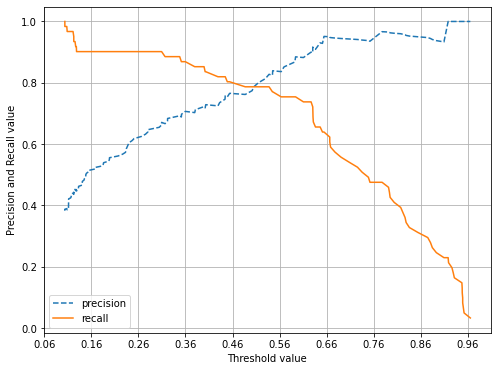

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 threshold값으로, y축을 정밀도, 재현율 값으로 각각 plot수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    #threshold 값 x축의 scale을 0.1 단위로 변경
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    #x축,y축 label과 legend 그리고 grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

# 4. F1 Score

F1= 2*(정밀도 * 재현율) / (정밀도 + 재현율)

In [39]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print('F1 스코어 : {0:.4f}'.format(f1))

F1 스코어 : 0.7805


In [40]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    #F1score 추가
    f1=f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    #f1 score print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds=[0.4,0.45,0.50,0.55,0.60]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 :  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, F1 : 0.7727
임계값 :  0.45
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, F1 : 0.7727
임계값 :  0.5
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, F1 : 0.7727
임계값 :  0.55
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, F1 : 0.7727
임계값 :  0.6
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, F1 : 0.7727


# 5. ROC 곡선과 AUC

roc곡선은 FPR(False Positive Rate,x축)가 변할때 TPR(True Positive Rate,y축)가 어떻게 변하는지 나타내는 곡선

tpr = 재현율, tp/(fn+tp) : 실제값 positive가 정확히 예측되어야 하는 수준

FPR=1-TPR

In [41]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
#반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step로 추출
#threshold[0]은 max(예측확률)+1로 임의설정됨, 이를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임계값 배열의 index : ',thr_index)
print('샘플 index로 추출한 임계값 : ',np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임계값에 따른 fpr,tpr 값
print('샘플 임계값 별 FPR : ',np.round(fprs[thr_index],3))
print('샘플 임계값 별 TPR : ',np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값 :  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값 별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값 별 TPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


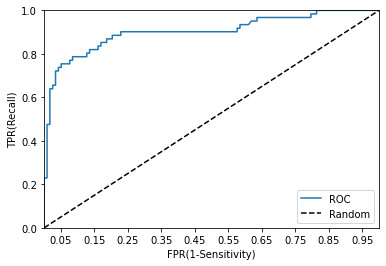

In [42]:
def roc_curve_plot(y_test,pred_proba_c1):
    #임계값에 따른 FPR,TPR 값을 반환받음
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs,tprs,label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    #FPR X 축의 Scale을 0.1 단위로 변경, x, y축 명 설정 등
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])

In [43]:
from sklearn.metrics import roc_auc_score
pred_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test,pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9025


In [44]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    #ROC-AUC 추가
    roc_auc=roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

# 6. 피마 인디언 당뇨병 예측

피쳐 구성

1. pregnancies : 임신 횟수
2. glucose : 포도당 부하 검사 수치
3. bloodpressure : 혈압
4. skintjickness : 팔 삼두근 뒤쪽의 피하지방 측정값
5. insulin : 혈청 인슐린
6. BMI : 체질량지수
7. diabetespredigreefunction : 당뇨 내력 가중치 값
8. age : 나이
9. outcome : 클래스 결정 값 (0or1)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data=pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [46]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
#피쳐 데이터 세트 X, 레이블 데이터 세트 y 추출
#맨 끝이 outcome 칼럼으로 레이블 값임, 칼럼위치 -1을 이용하여 추출
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)#지정한 데이터의 비율 유지

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도 : 0.7727, 정밀도 : 0.7209, 재현율 : 0.5741, F1 : 0.6392, AUC : 0.7919


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


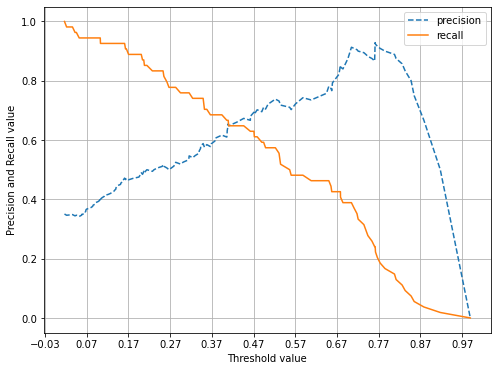

In [49]:
pred_proba_c1=lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [50]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

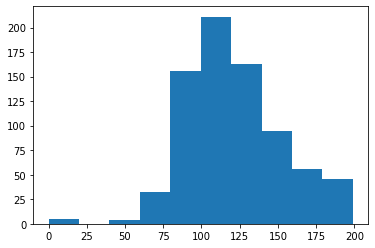

In [51]:
plt.hist(diabetes_data['Glucose'],bins=10)

In [54]:
#0값을 검사할 피처 명 리스트
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체 데이터 건수
total_count=diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 -인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count=diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [55]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
mean_zero_features=diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)

In [57]:
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

#StandardScaler 클래스를 이용하여 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred,pred_proba)

오차 행렬
[[90 10]
 [20 34]]
정확도 : 0.8052, 정밀도 : 0.7727, 재현율 : 0.6296, F1 : 0.6939, AUC : 0.8446


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# 분류 결정 임계값을 변화시키면서 재현율 값의 성능 수치를 확인해보자

from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도 : 0.7143, 정밀도 : 0.5658, 재현율 : 0.7963, F1 : 0.6615, AUC : 0.8446
임곗값: 0.33
오차 행렬
[[73 27]
 [13 41]]
정확도 : 0.7403, 정밀도 : 0.6029, 재현율 : 0.7593, F1 : 0.6721, AUC : 0.8446
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도 : 0.7468, 정밀도 : 0.6190, 재현율 : 0.7222, F1 : 0.6667, AUC : 0.8446
임곗값: 0.39
오차 행렬
[[76 24]
 [16 38]]
정확도 : 0.7403, 정밀도 : 0.6129, 재현율 : 0.7037, F1 : 0.6552, AUC : 0.8446
임곗값: 0.42
오차 행렬
[[83 17]
 [17 37]]
정확도 : 0.7792, 정밀도 : 0.6852, 재현율 : 0.6852, F1 : 0.6852, AUC : 0.8446
임곗값: 0.45
오차 행렬
[[85 15]
 [19 35]]
정확도 : 0.7792, 정밀도 : 0.7000, 재현율 : 0.6481, F1 : 0.6731, AUC : 0.8446
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.8446
임곗값: 0.5
오차 행렬
[[90 10]
 [20 34]]
정확도 : 0.8052, 정밀도 : 0.7727, 재현율 : 0.6296, F1 : 0.6939, AUC : 0.8446


In [63]:
#임계값을 0.48로 설정한 binarizer 생성
binarizer=Binarizer(threshold=0.48)

#위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 binarizer 변환
pred_th_048=binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test,pred_th_048,pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]]
정확도 : 0.7987, 정밀도 : 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.8446
